> # **ADVANCED ALGORITHM ASSIGNMENT** UE19CS311




####***Implement 1-D & 2-D Fourier Transform & RSA Encryption on a M x N matrix to achieve Fast Polynomial Multiplication, Secure transmission and Lossy Image compression.***

IMPORTED MODULES

In [ ]:
from numpy import transpose
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread

Implement 1-D DFT ,on coefficient vectors of two polynomials A(x), B(x)
 by multiplication of Vandermonde matrix . ( O(n2 ) - Complexity)

In [ ]:
#1-D DFT
def arrayofarray(dft):
    def inner(x):
        x = np.asarray(x, dtype=np.complex)
        if len(x.shape) == 2:
          final=[]
          for i in x:
            final.append(dft(i))
          return final 
        return dft(x)    
    return inner


@arrayofarray
def dft(x):
  v = np.asarray(x, dtype=np.complex)
  omga=np.exp((-2j*np.pi)/v.shape[-1])
  W=[]
  for i in range(v.shape[-1]):
    p=[]
    for j in range(v.shape[-1]):
      p.append(omga**(i*j))
    W.append(p)  
  fin=list(np.matmul(W, v))
  return fin

Implement 1-D FFT on the same vectors, of A(x) and B(x). Ensure above two steps produce same results. ( O(n logn) – Complexity)

In [ ]:
#1-D FFT
def arrayofarrays(fft):
    def inner(x):
        x=np.array(x,dtype=np.complex)
        if len(x.shape) == 2:
          final=[]
          for i in x:
            final.append(fft(i))
          return final 
        return fft(x)    
    return inner


@arrayofarrays   
def fft(x):
  x=np.array(x,dtype=np.complex)
  N = len(x)

  if N == 1:
    return [x[0]]

  X = [0] * N

  even = fft(x[:N:2])
  odd = fft(x[1:N:2])

  for k in range(N//2):
    w = math.e**(-2j*math.pi * k/N)
    X[k] = even[k] + w * odd[k]
    X[k + N//2] = even[k] - w * odd[k]

  return X

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(dft(m), fft(m))

True

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(dft(m), np.fft.fft(m))

True

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(dft(m),fft(m))

True

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[0.00010013580322265625, 0.00010371208190917969, 0.0003800392150878906, 0.0019698143005371094, 0.007980585098266602, 0.030362844467163086, 0.12091493606567383, 0.32153892517089844, 1.1050853729248047, 4.1326775550842285]
[9.655952453613281e-05, 0.0002658367156982422, 0.0018649101257324219, 0.0006070137023925781, 0.0014085769653320312, 0.004684925079345703, 0.0055768489837646484, 0.011516809463500977, 0.015546083450317383, 0.029389381408691406]
[3.361701965332031e-05, 1.6689300537109375e-05, 2.2411346435546875e-05, 2.7418136596679688e-05, 3.337860107421875e-05, 4.363059997558594e-05, 4.100799560546875e-05, 5.2928924560546875e-05, 4.982948303222656e-05, 9.608268737792969e-05]


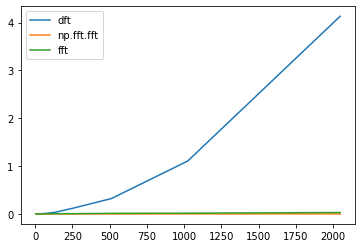

In [ ]:
entriesA=[]
entriesB=[]
tdft=[]
tfft=[]
tnpfft=[]
y=[2 ** x for x in range(2,12)]
print(y)
for i in y: 
  m=np.random.randint(100, size=(i))
  n=np.random.randint(100, size=(i))
  entriesA.append(m)
  entriesB.append(n)
  begin = time.time()
  dft(m)
  end = time.time()
  tdft.append(end-begin)

  begin = time.time()
  fft(m)
  end = time.time()
  tfft.append(end-begin)

  begin = time.time()
  np.fft.fft(m)  
  end = time.time()
  tnpfft.append(end-begin)
print(tdft)
print(tfft)
print(tnpfft)
plt.plot(y, tdft,  label = "dft")
plt.plot(y, tnpfft, label = "np.fft.fft")  
plt.plot(y, tfft,  label = "fft")
plt.legend()
plt.show()

Pointwise multiply results of Step 2 to produce C(x) in P-V form

In [ ]:
def pointwise_mul(list1, list2):
  products=[]
  for num1, num2 in zip(list1, list2):
    products.append(num1 *num2)
  return products

In [ ]:
for i in range(len(entriesA)):
  print(pointwise_mul(fft(entriesA[i]), fft(entriesB[i])))

[(21177+0j), (1769-547.9999999999998j), (-775+0j), (1769+548j)]
[(87607+0j), (-1.2309549925788588+1970.165655689594j), (5203+10324j), (-4014.769045007421-623.8343443104072j), (4235+0j), (-4014.769045007422+623.8343443104063j), (5203-10324j), (-1.230954992577722-1970.1656556895935j)]
[(728787+0j), (3105.9726722231326+6086.003537045704j), (-234.48430969210017-12631.64620182103j), (21260.081171390208+18409.238225484354j), (2886+6539j), (-4197.555992559186-4385.800928588536j), (-3819.515690307897-3197.646201821027j), (11583.502148945841-7105.035617027178j), (-30371+0j), (11583.502148945838+7105.035617027184j), (-3819.5156903078996+3197.646201821026j), (-4197.555992559186+4385.800928588536j), (2886-6539j), (21260.081171390215-18409.23822548435j), (-234.4843096921029+12631.646201821026j), (3105.972672223137-6086.003537045704j)]
[(2208885+0j), (14382.61315923755-21178.231332752257j), (-4343.368268451622-5382.579604442343j), (9396.992243490613+24965.030544621954j), (-19283.76221772356-11823.79

RSA encrypt (128-bit , 256-bit and 512-bit ) , with public key , the C(x) in PV form, for transmission security and decrypt with a private
 key and verify .

GENERATE LARGE PRIME NUMBERS AND VERIFY IT THROUGH MILLER-RABIN TEST

In [ ]:
def generate_random_number(no_of_bits):
    return random.randrange(2**(no_of_bits-1)+1, 2**no_of_bits - 1)


In [ ]:
def generate_prime_list(n):
    prime_list=list()
    for i in range(1,n+1):
        if i>1:
            for j in range(2,i):
                if( i % j )==0:
                    break
            else:
                prime_list.append(i)       
    return prime_list
prime_number_list=generate_prime_list(350)

In [ ]:
def low_level_prime(n):
    while True:
        num=generate_random_number(n)
        for i in prime_number_list:
            if num%i==0 and i**2<=num:
                break
            else:
                return num



In [ ]:
def Miller_Rabin(n):
	x = 0
	y = n-1
	while y % 2 == 0:
		y >>= 1
		x += 1
	assert(2**x * y == n-1)

	def trialComposite(t):
		if pow(t, y, n) == 1:
			return False
		for i in range(x):
			if pow(t, 2**i * y, n) == n-1:
				return False
		return True
	m = 20
	for i in range(m):
		t = random.randrange(2, n)
		if trialComposite(t):
			return False
	return True

In [ ]:
p_file=open('P.txt','w+')
i=100000
while i:
    P=16
    x=low_level_prime(P)
    if not Miller_Rabin(x):
        continue
    else:
        p_file.write("%d\n"%x)
        i=i-1


In [ ]:
q_file=open('Q.txt','w+')
i=100000
while i:
    Q=16
    x=low_level_prime(P)
    if not Miller_Rabin(x):
        continue
    else:
        q_file.write("%d\n"%x)
        i=i-1

 RSA IMPLEMENTATION

In [ ]:
def egcd(a, b):
    if b==0: 
      return (a,1,0)
    else:
      d1, x1, y1= egcd(b, a % b)  
      d= d1
      x= y1
      y= x1 - (a//b)*y1
      return (d,x,y)

In [ ]:
def modularInv(a, n):
    d, x, y = egcd(a, n)
    b=1
    if b%d==0:
        p= (x*(b/d))%n
        return p

In [ ]:
def isCoprime(a,b):
  gcd,_,_=egcd(a,b)
  return gcd==1

In [ ]:
class RSA:
    def __init__(self, size):
        a,b=self.rsa()
        self.e = b[0] 
        self.n= b[1]
        self.fullset=(a,b)
        self.d=a[0]
        self.size=size
    def random_line(self,fname):
        lines=open(fname).read().splitlines()
        r= random.choice(lines)
        return int(r)
    def rsa(self):
        P=self.random_line("/content/P (1).txt")
        Q=self.random_line("/content/Q (1).txt")
        e=7
        tot=(P-1)*(Q-1)
        while (not isCoprime(e, tot)):
          el=[3, 5, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
          e=random.choice(el)
        n=P*Q
        p=modularInv(e,tot)
        prikey=(p,n)
        
        pubkey=(e,n)
        return (prikey,pubkey)
    def encrypt(self, new):
        msgasc=[]
        for i in new:
          #print(new)
          c=str(complex(i))
          c=c[1:-1]
          # print("hi")
          # print(c)
          l=[]
          for j in c:
            l.append(ord(j))
          msgasc.append(l)
        enc=[]  
        for a in msgasc:
          encs=[]
          for z in a:
            encs.append(pow(z, int(self.e), self.n))
          enc.append(encs)             
        return enc
    def decrypt(self, ciph):
        b=[]
        for var in ciph:
          str1=''
          for pin in var:
            dvar=pow(pin, int(self.d), self.n)
            str1+=chr(dvar)
          b.append(str1)
        deciph=[]  
        for i in b:
          deciph.append(complex(i))
        return deciph  

In [ ]:
L=RSA(16)
msg=pointwise_mul(fft(entriesA[0]),fft(entriesB[0]))
a=L.encrypt(msg)
w=L.decrypt(a)
np.allclose(msg,w)

True

In [ ]:
print(msg)

[(21177+0j), (1769-547.9999999999998j), (-775+0j), (1769+548j)]


In [ ]:
for i in a:
  print(i)

[1767857149, 2072856716, 2072856716, 1658834634, 1658834634, 10716914, 771975459, 1594447048]
[2072856716, 1658834634, 102855116, 576270483, 775978447, 2118406211, 1491474047, 1658834634, 26488014, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 576270483, 1900942592, 1594447048]
[775978447, 1658834634, 1658834634, 2118406211, 10716914, 771975459, 1594447048]
[2072856716, 1658834634, 102855116, 576270483, 10716914, 2118406211, 1491474047, 1900942592, 1594447048]


In [ ]:
print(w)

[(21177+0j), (1769-547.9999999999998j), (-775+0j), (1769+548j)]


Implement 1-D Inverse FFT (I-FFT) on C(x), in PV form (Interpolation)
 to get C(x) in Coefficient form (CR) Polynomial.

In [ ]:
#Inverse FFT
def arrayofarrayys(ifft):
    def inner(x):
        x=np.array(x,dtype=np.complex)
        if len(x.shape) == 2:
          final=[]
          for i in x:
            final.append(ifft(i))
          return final 
        return ifft(x)    
    return inner


@arrayofarrayys   
def ifft(x):
    x = np.asarray(x, dtype=complex)
    x_conjugate = np.conjugate(x)

    inverse = fft(x_conjugate)

    inverse = np.conjugate(inverse)
    inverse = inverse / x.shape[0]
    return inverse

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(ifft(m), np.fft.ifft(m))

True

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[0.00012636184692382812, 0.0001354217529296875, 0.0002586841583251953, 0.0005469322204589844, 0.0011556148529052734, 0.0023910999298095703, 0.0029821395874023438, 0.006379842758178711, 0.013216972351074219, 0.027857542037963867]
[3.0994415283203125e-05, 1.239776611328125e-05, 1.3113021850585938e-05, 1.6689300537109375e-05, 2.0503997802734375e-05, 1.8835067749023438e-05, 1.4781951904296875e-05, 2.193450927734375e-05, 4.00543212890625e-05, 6.031990051269531e-05]


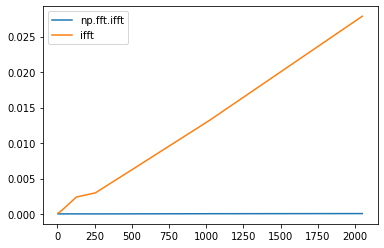

In [ ]:
tifft=[]
tnpifft=[]
y=[2 ** x for x in range(2,12)]
print(y)
for i in y: 
  m=np.random.randint(100, size=(i))
  n=np.random.randint(100, size=(i))
  entriesA.append(m)
  entriesB.append(n)

  begin = time.time()
  ifft(m)
  end = time.time()
  tifft.append(end-begin)

  begin = time.time()
  np.fft.ifft(m)  
  end = time.time()
  tnpifft.append(end-begin)

print(tifft)
print(tnpifft)
plt.plot(y, tnpifft, label = "np.fft.ifft")  
plt.plot(y, tifft,  label = "ifft")
plt.legend()
plt.show()

Verify correctness of C(x) , by comparing with the coefficients generated
 by a Elementary “Convolution For Loop” on the Coefficients of A(x) and B(x)

In [ ]:
#takes A(x) and B(x) in n CR form and outputs C(x)=A(x)*B(x) in CR form 
def fast_multiplication(arr1, arr2):
  n=len(arr1)
  for i in range(n, 2*n):
    arr1.append(0)
    arr2.append(0)  
  arr3=np.asarray(fft(arr1), dtype=complex)
  arr4=np.asarray(fft(arr2), dtype=complex)
  products=pointwise_mul(arr3, arr4)
  return np.round(ifft(products))
  

In [ ]:
#Convolution for loop
def c_in_cr(arr1, arr2):
  convol=[0]*len(arr1)*2
  for i in range(len(arr1)):
    for j in range(len(arr2)):
      convol[i+j]+=arr1[i]*arr2[j]
  return convol    

In [ ]:
#
np.allclose(fast_multiplication([2,1,0,0], [2,1,0,0]),c_in_cr([2,1,0,0], [2,1,0,0]))

True

30
10


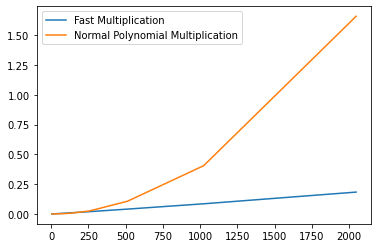

In [ ]:
plotx=[]
plotxslo=[]
y=[2 ** x for x in range(2,12)]
entriesA1=[]
entriesB1=[]
for i in y: 
  m=np.random.randint(100, size=(i))
  n=np.random.randint(100, size=(i))
  entriesA1.append(m)
  entriesB1.append(n)
for i in range(len(entriesA1)):
  begin=time.time()
  fast_multiplication(list(entriesA1[i]), list(entriesB1[i]))
  end=time.time()
  plotx.append(end-begin)

  begin=time.time()
  c_in_cr(list(entriesA[i]), list(entriesB[i]))
  end=time.time()
  plotxslo.append(end-begin)
print(len(entriesA))
print(len(plotx))
plt.plot(y, plotx,  label = "Fast Multiplication")
plt.plot(y, plotxslo,  label = "Normal Polynomial Multiplication")
plt.legend()
plt.show()
  

Implement a 2-D FFT and 2-D I-FFT module using your 1-D version
 (This just means , applying FFT on the Rows First and Columns Next on
 M x N matrix of numbers !!)


In [ ]:
#2D FFT 
def fft2_d(matrix):
   fftRows = np.asarray([np.fft.fft(row) for row in matrix],dtype=np.complex_)
   fftColumns=np.asarray(transpose([np.fft.fft(column) for column in transpose(fftRows)]),dtype=np.complex_)
   return fftColumns

a =np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

In [ ]:

np.allclose(fft2_d(a), np.fft.fft2(a))

True

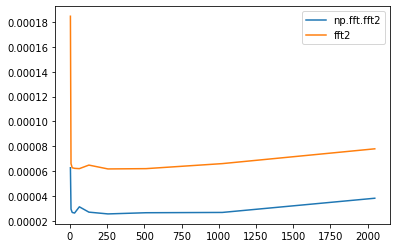

In [ ]:
ntfft2=[]
tfft2=[]
for i in y: 
  m=np.array([[1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24]])
  begin = time.time()
  fft2_d(m)
  end = time.time()
  tfft2.append(end-begin)
  begin = time.time()
  np.fft.fft2(m)
  end = time.time()
  ntfft2.append(end-begin)


plt.plot(y,ntfft2,label="np.fft.fft2")
plt.plot(y, tfft2,  label = "fft2")
plt.legend()
plt.show()

In [ ]:
#2-D Inverse FFT
def ifft2d(matrix):
   fftRows = np.asarray([ifft(row) for row in matrix],dtype=np.complex_)
   fftcolumns=np.asarray(transpose([ifft(column) for column in transpose(fftRows)]),dtype=np.complex_)
   return fftcolumns

In [ ]:
np.allclose(ifft2d(a), np.fft.ifft2(a))

True

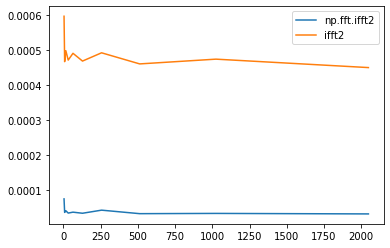

In [ ]:
ntifft2=[]
tifft2=[]
for i in y: 
  m=np.array([[1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24]])
  begin = time.time()
  ifft2d(m)
  end = time.time()
  tifft2.append(end-begin)
  begin = time.time()
  np.fft.ifft2(m)
  end = time.time()
  ntifft2.append(end-begin)


plt.plot(y,ntifft2,label="np.fft.ifft2")
plt.plot(y, tifft2,  label = "ifft2")
plt.legend()
plt.show()

Verify your of Step (vii) correctness on a Grayscale matrix ( which has random
 integer values in the range 0-255; 255 → White & 0 → Black))


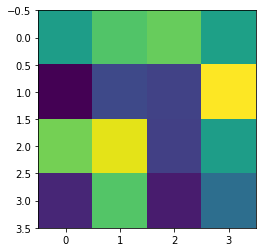

In [ ]:
A = np.reshape(np.random.random(4*4),(4,4))

y_A = fft2_d(A).real
y_c = np.fft.fft2(A)
A_c = ifft2d(y_A)
A_y=np.fft.ifft2(A)
plt.imshow(A)

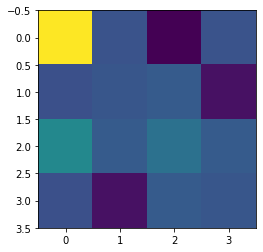

In [ ]:
check_2dfft=(y_A).real
plt.imshow(check_2dfft)

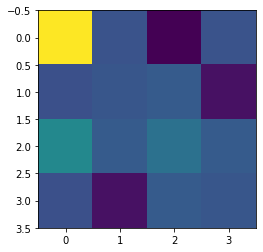

In [ ]:
check_np_2dfft=(y_c).real
plt.imshow(check_np_2dfft)

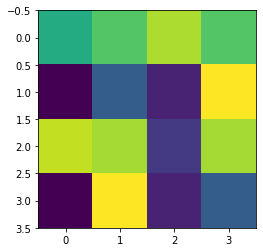

In [ ]:
check_2difft=(A_c).real
plt.imshow(check_2difft)

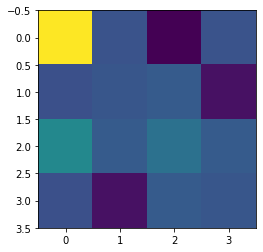

In [ ]:
check_np_2difft=(A_y).real
plt.imshow(check_np_2difft)

Apply your 2D-FFT on TIFF/JPG (lossless) Grayscale image and drop
 Fourier coefficients below some specified magnitude and save the
 2D- image to a new file.

and 

 Apply 2D I-FFT, on the Quantized Grayscale image and render it to
 observe Image Quality.


In [ ]:
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

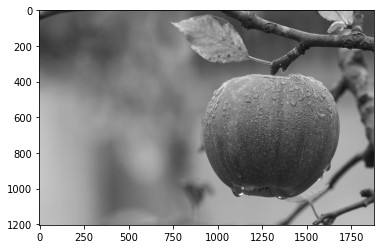

In [ ]:
image=imread("/content/gray.jpeg")
plt.imshow(image, "gray")

In [ ]:
def compress(img, cmpr):
 # print(img.shape)
  b=fft2_d(img)
  b_sort=np.sort(np.abs(b.ravel()))
  thresh=b_sort[round(abs(np.floor(((1-cmpr)*len(b_sort)))))]
  print(thresh)
  print(max(b.ravel()))
  b=b.ravel()
  for i in range(len(b)):
    if abs(b[i])<thresh:
      b[i]=0
  #np.testing.assert_array_equal(abs(np.fft.ifft2(b.reshape(img.shape))),img)    
  plt.imshow(abs(np.fft.ifft2(b.reshape(img.shape))), "gray")



here, the compression % is .1 
=> 99.9% of the values were chucked out. Despite that, the image is quite clear.

18278.807361876577
(274395457+0j)


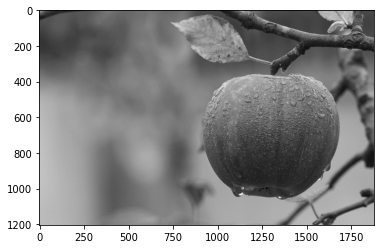

In [ ]:
compress(image, .1)

75518.44969301533
(274395457+0j)


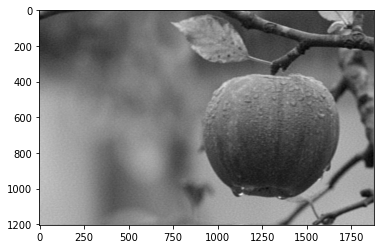

In [ ]:
compress(image,.01)

356596.45392414974
(274395457+0j)


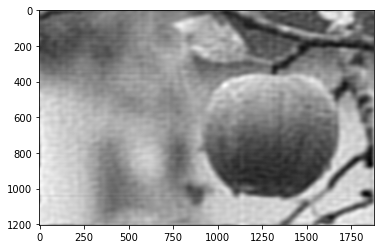

In [ ]:
compress(image, .001)

1968686.475233091
(274395457+0j)


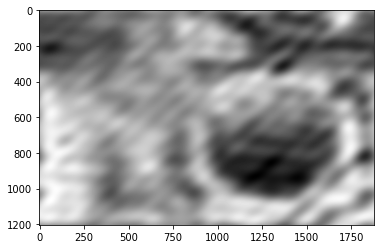

In [ ]:
compress(image, .0001)